# Tarea 3: Matemáticas para la ciencia de datos: Tarea 3
## Alumna: Jessica Nicole Bracamonte Dzib 

### Considere el siguiente sistema de ecuaciones diferenciales        $(1)$

$F′ =(2−S)F, F(0)=F_0$

$S′ =(F-1)S, S(0)=S_0$                        

1. (20 puntos) Dar una solución analítica del sistema, en términos de las condiciones iniciales.

Para encontrar la relación entre F y S, creamos una nueva ecuación que muestre la relación de las derivadas  F' y S'. 

$$ 
\frac{dS}{dF} = \frac{S(F -1)}{F(2 -S)} 
$$

Separando las variables, obtenemos que:

$$
\frac{(2 - S)}{S} dS = \frac{(F -1)}{F} dF 
$$

Integrando por ambos lados:

$$
\int \frac{(2 - S)}{S} \mathrm{d}S  =  \int \frac{(F -1)}{F} \mathrm{d}F
$$|

Para:
$$
\int \frac{(2 - S)}{S} \mathrm{d}S  =
$$
Expandimos:
$$
\int \frac{2}{S} - 1 \mathrm{d}S =
$$
y resolvemos
$$
\int \frac{2}{S} \mathrm{d}S - \int 1 \mathrm{d}S =
$$
para obtener:
$$
2lnS - S =
$$

Para:
$$
= \int \frac{(F - 1)}{F} \mathrm{d}F  
$$
resolvemos:
$$
= F - lnF
$$


Agregamos la constante de integración y obtenemos una solución al sistema:

$$
2lnS - S = F - lnF + C
$$

2. (10 puntos) Verifique que el sistema $(1)$ admite el esquema numérico $(2)$

$F_{n+1} =F_n +∆t (2−S_n)F_n$

$S_{n+1} =S_n + ∆t (F_n - 1)S_n$

Explique el procedimiento para llegar a la expresión anterior.

Para verificar que el sistema (1) admite el esquema numérico (2) de arriba, seguimos la guía del libro e introducimos el paso del tiempo $∆t > 0$ y definimos que $t_n = n∆t$. Dejamos que $F_n$ y $S_n$ denoten las aproximaciones de $F(t_n)$ y $S(t_n)$, ya que:

$$ 
\frac{F(t_{n+1}) - F(t_n)}{∆t} = F'(t_n)       
$$
$$
\frac{S(t_{n+1}) - S(t_n)}{∆t} = S'(t_n)
$$


Introducimos el esquema numérico:

$$
\frac{F(t_{n+1}) - F(t_n)}{∆t} = (2 - S_n) F_n
$$
$$
\frac{S(t_{n+1}) - S(t_n)}{∆t} = (F_n - 1) S_n
$$

Y lo reescribimos en forma computacional para verificar de manera exitosa que el sistema (1) admite el esquema numérico (2):
$$
F_{n+1} =F_n +∆t (2−S_n)F_n
$$
$$
S_{n+1} =S_n + ∆t (F_n -1)S_n
$$

3. Realice un programa que implemente el esquema $(2)$ y que realice las siguientes funciones

a) (10 puntos) Acepte como entradas $S0$,$F0$ y $∆t$.

b) (10 puntos) Calcule la solución numérica para t variando de 0 a 10. Indique la solución numérica cuando $S0 = 0.1$, $F0 = 1.9$ y $∆t = 0.001.$

In [4]:
# Librerías que utilizaremos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

In [5]:
# Definimos la ecuación diferencial con ayuda de la librería sympy
F = sp.symbols('F')
S = sp.Function('S')

In [6]:
# Inicializamos los parámetros que conocemos:
F_0 = 1.9  #valor inicial de F
S_0 = 0.1    #Valor inicial de S
T = 10        #Tiempo final hasta el cual el cual se calculará la solución
h = 0.0001        #Tamaño de salto

In [7]:
# Definimos funciones para almacenar las ecuaciones diferenciales.
def f_F(F, S):
    return (2- S)*F

def f_S(F,S):
    return (F -1)*S

In [8]:
#Definimos la función que reciba los valores de F_0, S_0 y h (o lo que es decir ∆t)
def modelo(t0, F_0, S_0, h, T):
    t = np.arange(t0, T+h, h)
    F = np.zeros(len(t))  #Lista con valores de F
    S = np.zeros(len(t))   #Lista con valores S
    
    F[0] = F_0
    S[0] = S_0
    

    for i in range(len(t)-1):
        F[i+1] = F[i] + h*f_F(F[i], S[i])
        S[i+1] = S[i] + h*f_S(F[i], S[i])
    return F, S, t

In [9]:
# Solución numérica con Euler hacia adelante
F, S, t = modelo(0, F_0, S_0, h, T)

print(F)
print(t)


[1.9        1.900361   1.90072207 ... 0.0047464  0.00474635 0.00474629]
[0.0000e+00 1.0000e-04 2.0000e-04 ... 9.9998e+00 9.9999e+00 1.0000e+01]


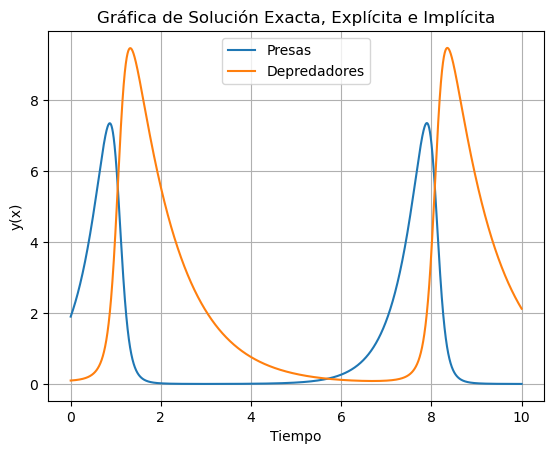

In [15]:
# Graficamos las soluciones
plt.plot(t, F, label='Presas')
plt.plot(t, S, label='Depredadores')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('y(x)')
plt.title('Gráfica de Solución Exacta, Explícita e Implícita')
plt.grid(True)
plt.show()

4. (20 puntos) Encuentre un segundo esquema numérico, usando Crank- Nicolson que represente al sistema de ecuaciones diferenciales $(1)$

La forma básica de Crank-Nicolson está dada por:
$$
\frac{u_{n+1} - u_n}{∆t} = \frac{1}{2} (f(u_{n+1}) + f(u_n))      
$$

Aplicando esta forma a ambas ecuaciones: 

$$
\frac{F_{n+1} - F_n}{∆t} = \frac{1}{2} [   (2 - S_n) + (2 - S_{n+1})  ]
$$

$$
\frac{S_{n+1} - S_n}{∆t} = \frac{1}{2} [   (F_n - 1) + (F_{n+1} - 1)    ]
$$

Que puede ser reescrito cómo:

$$
F_{n+1} + \frac{∆t}{2} S_{n+1}  =  F_n + ∆t - \frac{∆t}{2} S_n
$$

$$
- \frac{∆t}{2} F_{n+1} +  S_{n+1}  =  S_n - ∆t +  \frac{∆t}{2} F_n
$$

5. (20 puntos) Grafique la solución numérica como una función de $t$ y en el espacio de estados en el sistema coordenado $F − S$.

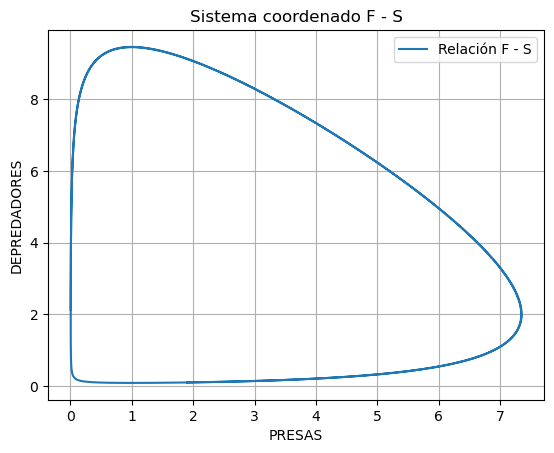

In [16]:
plt.plot(F,S, label='Relación F - S')
plt.legend()
plt.xlabel('PRESAS')
plt.ylabel('DEPREDADORES')
plt.title('Sistema coordenado F - S')
plt.grid(True)
plt.show()


6. (10 puntos) Explique alguna aplicación o fenómeno modelado a través de sistemas de ecuaciones diferenciales.